In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt


In [ ]:
# Load dataset
df = pd.read_csv('/content/shampoo.csv', index_col='Month', parse_dates=True, squeeze=True)

<ipython-input-6-f0fe006a3e1e>:2: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  df = pd.read_csv('/content/shampoo.csv', index_col='Month', parse_dates=True, squeeze=True)


In [ ]:
df.head(5)

Month
1-01    266.0
1-02    145.9
1-03    183.1
1-04    119.3
1-05    180.3
Name: Sales, dtype: float64

In [ ]:
# Split into training and testing data
train_data = df[:'1972-10-01']
test_data = df['1972-11-01':]

In [ ]:
model = ARIMA(train_data, order=(2,0,2))
model_fit = model.fit()
predictions = model_fit.forecast(steps=len(test_data))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

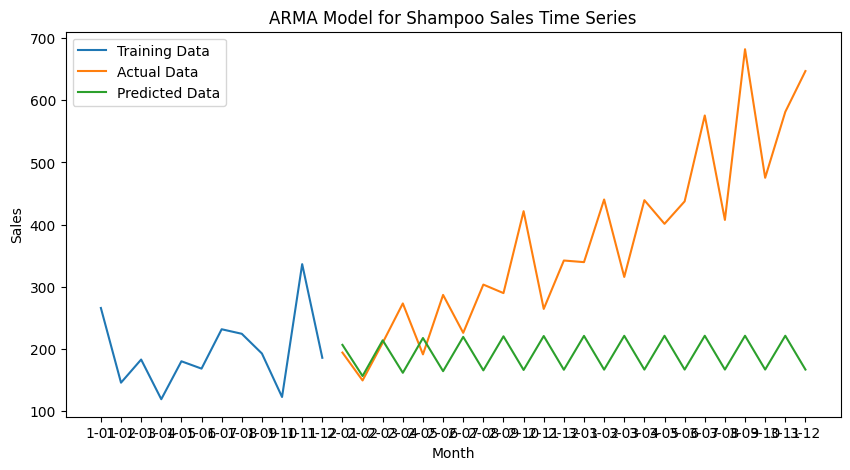

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(train_data, label='Training Data')
plt.plot(test_data, label='Actual Data')
plt.plot(test_data.index, predictions, label='Predicted Data')
plt.legend()
plt.title('ARMA Model for Shampoo Sales Time Series')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()